In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import os
import io
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
import matplotlib.style as style
#plt.style.use('seaborn-whitegrid')
# set style for plots
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [3]:
# import the csvs to look at from article
confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

url = confirmed_url
s = requests.get(url).content
cases = pd.read_csv(io.StringIO(s.decode('utf-8')))

url = deaths_url
s = requests.get(url).content
deaths = pd.read_csv(io.StringIO(s.decode('utf-8')))
states = cases.iloc[:,6].unique()
states.sort()

In [4]:
# save / update files
#data_dir = '/Users/andrew_boles/Documents/Jupyter Files/data/covid-19 data/'
#cases.to_csv('us_cases.csv',index=False)
#deaths.to_csv('us_deaths.csv',index=False)

# Total Cases / Deaths in US

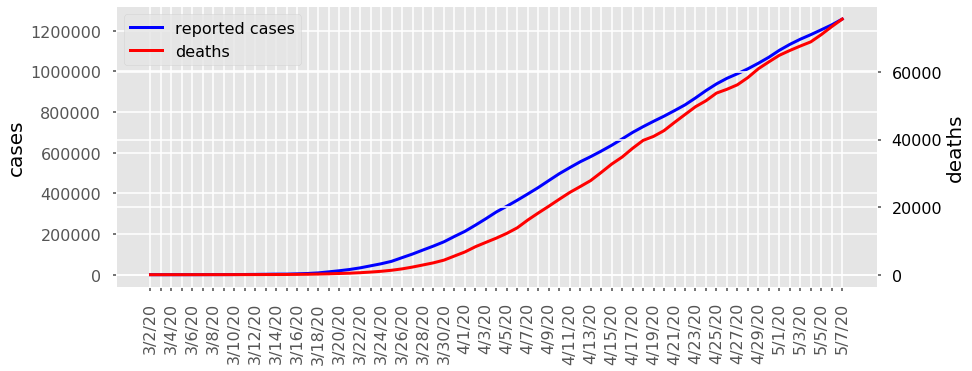

In [6]:
plt.figure(figsize=(30,30))
#plt.tight_layout(pad=3.0)

#plt.rcParams.update({'font.size': 26})

ma = np.where(cases['Country_Region'] == 'US')[0]
c_count = cases.iloc[ma, 11:].sum(axis=0)
d_count = deaths.iloc[ma, 12:].sum(axis=0)
    
if np.max(c_count) > 10000:
    sig_cases = np.where(c_count > 30)[0]
    ax1 = plt.subplot(5, 2,1)
    res1, = plt.plot(c_count[sig_cases], 'b', linewidth=3, label="reported cases")
    plt.xticks(rotation=90)
    ax2 = ax1.twinx()
    res2, = ax2.plot(d_count[sig_cases], 'r', linewidth=3, label="deaths")
        
    #plt.title('United States',fontsize=40)
    ax1.set_ylabel('cases', color="black",fontsize=20)
    ax2.set_ylabel('deaths', color='black',fontsize=20)
    ax2.tick_params(axis='y', labelcolor='black')
    x_tick_label = []
    # this is a *very* ghetto way of doing this - need to fix
    
    count = 0
    for l in c_count.index.values.tolist()[40:]:
        if (count % 2 == 0):
            x_tick_label.append(l)
        else:
            x_tick_label.append('')
        count = count + 1
    ax1.set_xticklabels(x_tick_label)
    
    plt.legend(handles=[res1, res2])


plt.show()

# Total Cases, Deaths in: New York, Tennessee and Texas

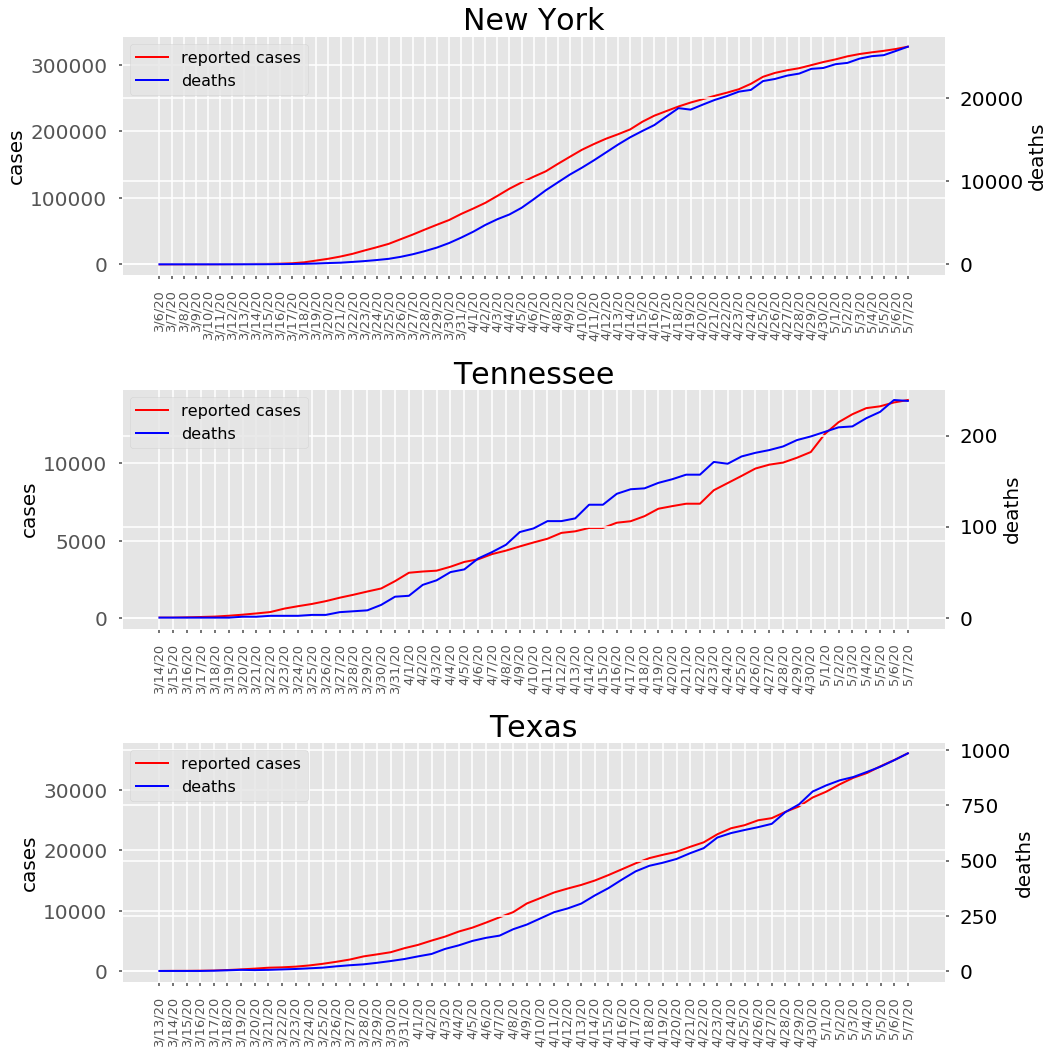

In [13]:
counter = 0

plt.figure(figsize=(15,15))
#plt.tight_layout(pad=3.0)

states = ['New York','Tennessee','Texas']

for state in states:
    ma = np.where(cases['Province_State'] == state)[0]
    c_count = cases.iloc[ma, 11:].sum(axis=0)
    d_count = deaths.iloc[ma, 12:].sum(axis=0)
    
    if np.max(c_count) > 10000:
        sig_cases = np.where(c_count > 30)[0]
        counter = counter + 1
        ax1 = plt.subplot(3, 1, counter)
        ax1.spines["bottom"].set_visible(False)    
        ax1.spines["right"].set_visible(False)    
        ax1.spines["left"].set_visible(False)
        ax1.get_xaxis().tick_bottom()    
        ax1.get_yaxis().tick_left()  
        res1, = plt.plot(c_count[sig_cases],color='r', linewidth=2, label="reported cases")
        plt.xticks(rotation=90)
        ax2 = ax1.twinx()
        res2, = ax2.plot(d_count[sig_cases],color='b', linewidth=2, label="deaths")
        
        plt.title(state,fontsize=30)
        ax1.set_ylabel('cases', color="black",fontsize=20)
        ax2.set_ylabel('deaths', color='black',fontsize=20)
        ax2.tick_params(axis='y', labelcolor='black')
        
        # need to figure out a way to handle xaxis for these plots
        # looks like NY starts having cases 3/6
        # TN starts having cases 3/14
        # texas starts having cases 3/13
        # this is a *very* ghetto way of doing this - need to fix
        count = 0
        if state == 'State Name':
            for l in c_count.index.values.tolist()[50:]:
                if (count % 2 == 0):
                    x_tick_label.append(l)
                else:
                    x_tick_label.append('')
                count = count + 1
            ax1.set_xticklabels(x_tick_label)
        
        plt.legend(handles=[res1, res2])

plt.tight_layout(pad=2.0)  
plt.show()

# Death rate changes over time in: New York, Tennesse, and Texas

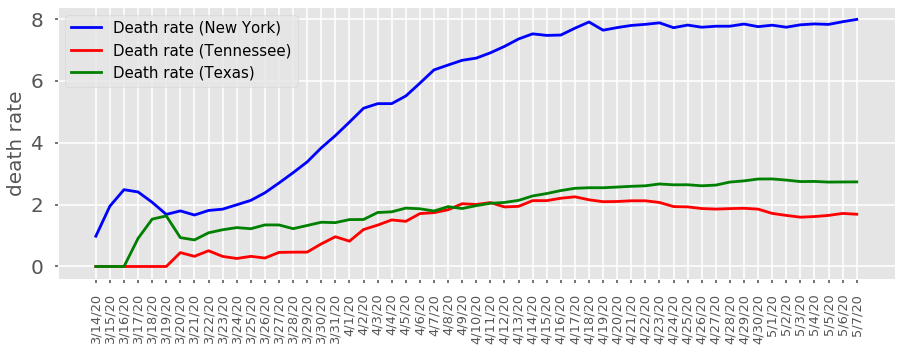

In [8]:
country1 = "New York"
country2 = "Tennessee"
country3 = "Texas"
country = country1
ma = np.where(cases["Province_State"] == country)[0]
country_count = cases.iloc[ma, 11:].sum(axis=0)
country_deaths = deaths.iloc[ma, 12:].sum(axis=0)
dr_c1 = country_deaths / country_count
d_cases = np.where(country_deaths > 3)[0]

country = country2
ma = np.where(cases["Province_State"] == country)[0]
country_count = cases.iloc[ma, 11:].sum(axis=0)
country_deaths = deaths.iloc[ma, 12:].sum(axis=0)
dr_c2 = country_deaths / country_count
d_cases_c2 = np.where(country_deaths > 3)[0]

country = country3
ma = np.where(cases["Province_State"] == country)[0]
country_count = cases.iloc[ma, 11:].sum(axis=0)
country_deaths = deaths.iloc[ma, 12:].sum(axis=0)
dr_c3 = country_deaths / country_count
d_cases_c3 = np.where(country_deaths > 3)[0]

plt.figure(figsize=(15,5))
plt.rc('ytick', labelsize=20) 
plt.rc('xtick', labelsize=13)
res1, = plt.plot(dr_c1[d_cases]*100, 'b', label="Death rate ("+country1+")")
res2, = plt.plot(dr_c2[d_cases]*100, 'r', label="Death rate ("+country2+")")
res3, = plt.plot(dr_c3[d_cases]*100, 'g', label="Death rate ("+country3+")")

plt.ylabel("death rate",fontsize=20)
plt.xticks(rotation=90)
plt.legend(handles=[res1, res2, res3],loc=2,fontsize=15)
plt.show()

# Some quick Death Rate Statistics:

In [9]:
# try to do deaths / population total
us_pop = deaths['Population'].sum()
us_total_cases = cases['5/7/20'].sum()
us_deaths = deaths['5/7/20'].sum()
print('United States Death Rate against total population: {:.3f}%'.format((us_deaths/us_pop)*100))
print('Unites States Death Rate against total COVID-19 Cases: {:.3f}%'.format((us_deaths/us_total_cases)*100))
print('------------------------------------------------')
for state in states:
    state_pop = deaths[deaths['Province_State'] == state]['Population'].sum()
    state_total_cases = cases[cases['Province_State'] == state]['5/7/20'].sum()
    state_deaths = deaths[deaths['Province_State'] == state]['5/7/20'].sum()
    print('{} Death Rate against total population: {:.3f}%'.format(state,(state_deaths/state_pop)*100))
    print('{} Death Rate against total COVID-19 Cases: {:.3f}%'.format(state,(state_deaths/state_total_cases)*100))
    print('------------------------------------------------')

United States Death Rate against total population: 0.023%
Unites States Death Rate against total COVID-19 Cases: 6.019%
------------------------------------------------
New York Death Rate against total population: 0.111%
New York Death Rate against total COVID-19 Cases: 7.984%
------------------------------------------------
Tennessee Death Rate against total population: 0.003%
Tennessee Death Rate against total COVID-19 Cases: 1.688%
------------------------------------------------
Texas Death Rate against total population: 0.003%
Texas Death Rate against total COVID-19 Cases: 2.733%
------------------------------------------------


# Comparison of three-day average case increases over past 15 days:

In [10]:
# number of cases for past three days compared to previous three days
three_days = cases[cases.columns[-3:]].sum().mean()
six_days = cases[cases.columns[-6:-3]].sum().mean()
nine_days = cases[cases.columns[-9:-6]].sum().mean()
twelve_days = cases[cases.columns[-12:-9]].sum().mean()
fifteen_days = cases[cases.columns[-15:-12]].sum().mean()
print('Average cases increase for 0-3 days ago compared to 3-6 days ago: +{:.0f}'.format(three_days-six_days))
print('Average cases increase for 3-6 days ago compared to 6-9 days ago: +{:.0f}'.format(six_days-nine_days))
print('Average cases increase for 6-9 days ago compared to 9-12 days ago: +{:.0f}'.format(nine_days-twelve_days))
print('Average cases increase for 9-12 days ago compared to 9-15 days ago: +{:.0f}'.format(twelve_days-fifteen_days))

Average cases increase for 0-3 days ago compared to 3-6 days ago: +73008
Average cases increase for 3-6 days ago compared to 6-9 days ago: +86053
Average cases increase for 6-9 days ago compared to 9-12 days ago: +82077
Average cases increase for 9-12 days ago compared to 9-15 days ago: +84627


In [11]:
test_list = []
